<h1>Ex1 Recommender Systems</h1>
<p>Nicolás Penagos - A00347293</p>

<h3>Project setup</h3>

In [25]:
"""
1. Load data
"""
import pandas as pd
df = pd.read_csv('data.csv')

"""
2. Setup widgets
"""
import ipywidgets as widgets

# Age
age = 1

age_slider = widgets.FloatSlider(
    value=age,
    min=0.1,
    max=1.0,
    step=0.1,
    description='Age',
    orientation='horizontal'
)

def age_slider_changed(change):
    global age
    age = change['new']
    
age_slider.observe(age_slider_changed, 'value')



# Height
height = 1

height_slider = widgets.FloatSlider(
    value=height,
    min=0.1,
    max=1.0,
    step=0.1,
    description='Height',
    orientation='horizontal'
)

def height_slider_changed(change):
    global height
    height = change['new']
    
height_slider.observe(height_slider_changed, 'value')

# Weight
weight = 1

weight_slider = widgets.FloatSlider(
    value=weight,
    min=0.1,
    max=1.0,
    step=0.1,
    description='Weight',
    orientation='horizontal'
)

def weight_slider_changed(change):
    global weight
    weight = change['new']
    
weight_slider.observe(weight_slider_changed, 'value')

# Semester
semester = 1

semester_slider = widgets.FloatSlider(
    value=semester,
    min=0.1,
    max=1.0,
    step=0.1,
    description='Semester',
    orientation='horizontal'
)

def semester_slider_changed(change):
    global semester
    semester = change['new']
    
semester_slider.observe(semester_slider_changed, 'value')

# Index
index = 0

numeric_input = widgets.BoundedIntText(
    value=0,
    min=0,
    max=df.shape[0]-1,
    step=1,
    description='Index:'
)

def on_numeric_input_change(change):
    global index
    index = change.new
    
numeric_input.observe(on_numeric_input_change, names='value')



<h3>Start here</h3>

In [26]:
df = pd.read_csv('data.csv')
print(df)
display(numeric_input)
display(age_slider)
display(height_slider)
display(weight_slider)
display(semester_slider)

   firstname  age  heightCm  weightKg  semester
0     Agathe   29       158        54         8
1   Modestia   16       194        71         1
2    Bettine   21       160        48        10
3     Lynnea   17       147        48         4
4     Oralee   24       149        66         7
5     Thalia   25       178        46         1
6     Norine   23       169        46         7
7      Minne   28       161        68         6
8     Livvyy   29       175        77         6
9        Raf   29       159        40         4
10     Zaria   30       148        79         6
11       Meg   16       144        55         3
12     Vivia   27       140        56         6
13    Deedee   23       173        53        10
14    Hayley   23       162        65        10
15    Karena   30       162        56         1
16      Viki   17       194        71         6
17     Selma   30       189        42         8
18     Helsa   25       147        62         1
19       Ayn   21       159        80   

BoundedIntText(value=0, description='Index:', max=19)

FloatSlider(value=1.0, description='Age', max=1.0, min=0.1)

FloatSlider(value=1.0, description='Height', max=1.0, min=0.1)

FloatSlider(value=1.0, description='Weight', max=1.0, min=0.1)

FloatSlider(value=1.0, description='Semester', max=1.0, min=0.1)

In [30]:
df = pd.read_csv('data.csv')

# 1. Normalize data 

"""
The transformation is given by:
X_scaled = (X - X_min) / (X_max - X_min)

"""
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['age', 'heightCm', 'weightKg', 'semester']] = scaler.fit_transform(df[['age', 'heightCm', 'weightKg', 'semester']])

# 2. Apply weights
df['age'] = df['age'].apply(lambda x: x*age)
df['heightCm'] = df['heightCm'].apply(lambda x: x*height)
df['weightKg'] = df['weightKg'].apply(lambda x: x*weight)
df['semester'] = df['semester'].apply(lambda x: x*semester)

# 3. Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(df[['age', 'heightCm', 'weightKg', 'semester']])

# 4. Transform to a dataframe
similarityToIndex = pd.DataFrame(
    list(zip(df['firstname'].values, similarities[index])),
    columns = ['firstname' , 'similarity']
)
similarityToIndex = similarityToIndex.drop(index)

# 5. Sort similarity descending

sortedSimilarity = similarityToIndex.sort_values(by=['similarity'], ascending=True)


<h3>Similarity respect to index</h3>


**Tip:** Compare Karena (15) with Modestia (1) first without changing the weight and then giving more weight to the **semester** variable and check what happens.

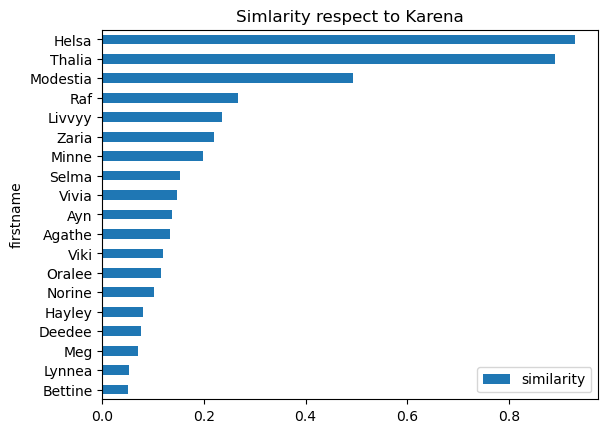

In [31]:
import matplotlib.pyplot as plot

sortedSimilarity.plot.barh(x='firstname', y='similarity', title="Simlarity respect to "+df['firstname'].values[index]);

plot.show(block=True);

<h3>Similarities HeatMap</h3>

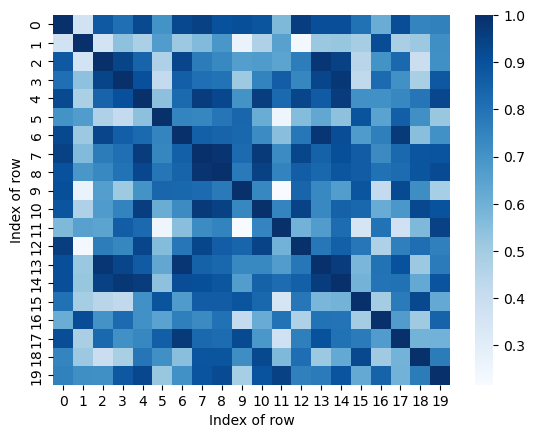

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.heatmap(similarities, cmap='Blues')
plt.xlabel('Index of row')
plt.ylabel('Index of row')
plt.show()